In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

c:\program files\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
videos = pd.read_csv("USvideos.csv",error_bad_lines=False)
videos


b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags    views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                                [none]  5845909  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
...                                                 ...      ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...   440393   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...    55762    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...   142908    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...    24532    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...   144039    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [7]:
videos.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

no null value in dataset


In [10]:
comments = pd.read_csv("UScomments.csv",error_bad_lines=False)
comments


b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

sentiment analysis of youtube_comments¶

In [11]:
polarity=[]

for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
comments['polarity'] = polarity

In [13]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

# Lets perform EDA for the Positve sentences

In [15]:
comments_positive = comments[comments['polarity'] == 1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [16]:
stopwords = set(STOPWORDS)

In [17]:
total_comments= (' '.join(comments_positive['comment_text']))

In [20]:
total_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

(-0.5, 999.5, 499.5, -0.5)

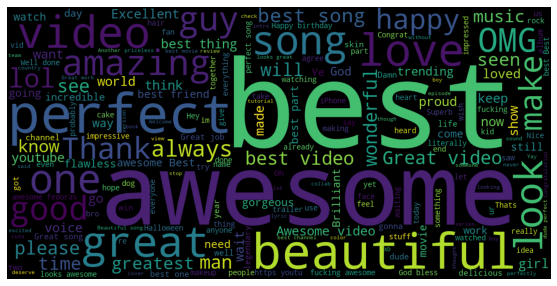

In [22]:
wordcloud = WordCloud(width=1000,height =500,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# negative sentences

In [23]:
comments_negative = comments[comments['polarity'] == -1]

In [24]:
comments_negative

video_id                                       comment_text likes  \
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  polarity  
512          0      -1.0  
562          0      -1.0  
952          0      -1.0  
1371         0      -1.0  
1391         0      -1.0  
...        ...       ...  
690788       0      -1.0  
690865       1      -1.0  
691073       0      -1.0  
691180       0      -1.0  
691224       0      -1.0  

[3508 rows x 5 columns]

(-0.5, 999.5, 499.5, -0.5)

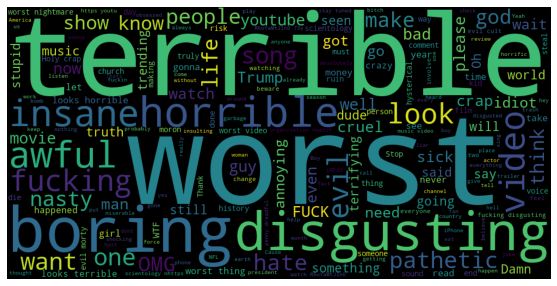

In [25]:
comments_negative= (' '.join(comments_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Analysing Tags column,what are trending tags on youtube


In [26]:
tags_complete = (''.join(videos['tags']))

In [29]:
import re
tags = re.sub('[^a-z,A-Z]',' ',tags_complete)
tags=re.sub(' +',' ',tags)

In [30]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang lifeApple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge vergejacksfilms parody parodies iphone iphone x iphone apple emojia a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Arti

(-0.5, 999.5, 499.5, -0.5)

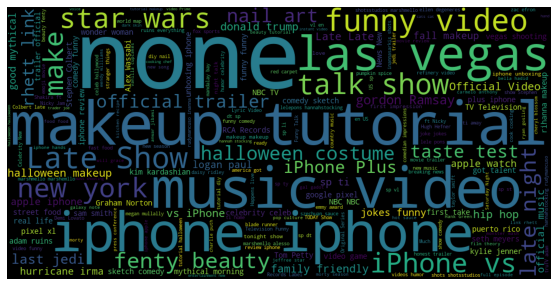

In [31]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS)).generate(tags)# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Lets find out the relation among continuous variables
As quite obvious the number of likes have very strong relation with views¶


Text(0.5, 1.0, 'Regression plot for likes & views')

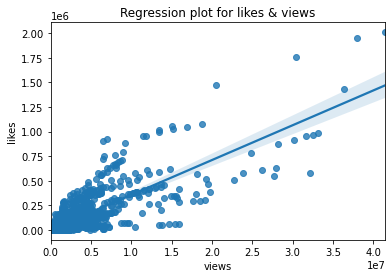

In [34]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for likes & views")

it can be seen that views and likes are strongly corelated and it means that more views can lead to an increase number of likes in the video

# dislikes vs views

Text(0.5, 1.0, 'Regression plot for dislikes & views')

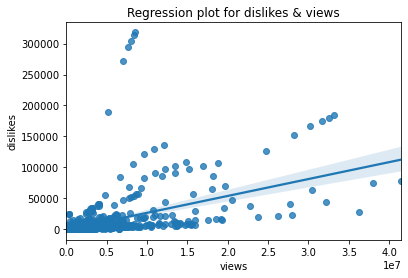

In [36]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot for dislikes & views")

#it can be seen that views and dislikes are not related to each other.
more views can have less number of dislike and it depends on the content 

# correlation matrix is the evidence of above analysis!

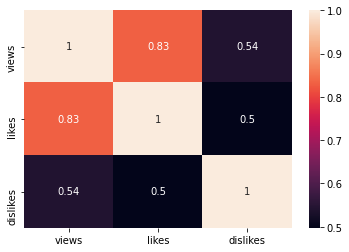

In [39]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)

it can seen that there is strong correlation between view and likes and less between view and dislikes

# Analyse Emojis in comments

In [40]:
import emoji

In [41]:
comments['comment_text'].dropna(inplace=True)

In [42]:
len(comments)

691400

In [43]:
comments['comment_text'][4]

'trending 😉'

# Every emoji has a Unicode associated with it

In [44]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [45]:
print(str)

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊🌀

In [46]:
res = {i : str.count(i) for i in set(str)} 
res

{'😶': 176,
 '👱': 24,
 '📬': 9,
 '⏲': 3,
 '😴': 187,
 '📠': 8,
 '☠': 156,
 '📶': 5,
 '👄': 90,
 '💍': 80,
 '🚐': 4,
 '🚖': 4,
 '🍒': 51,
 '🌘': 4,
 '📍': 7,
 '✴': 23,
 '📽': 11,
 '👘': 14,
 '⌨': 4,
 '🍛': 21,
 '📙': 8,
 '🍉': 97,
 '🎑': 5,
 '🕌': 6,
 '🌅': 13,
 '🌓': 5,
 '✋': 99,
 '😮': 1232,
 '👶': 53,
 '🍣': 23,
 '🏆': 121,
 '🇻': 81,
 '🦈': 10,
 '🦐': 7,
 '🎂': 156,
 '⚙': 2,
 '⤴': 7,
 '🦍': 4,
 '😁': 2220,
 '😖': 287,
 '💻': 27,
 '♌': 7,
 '🕞': 5,
 '🍩': 61,
 '🍤': 19,
 '🍍': 165,
 '☃': 32,
 '🕙': 4,
 '🌹': 622,
 '🔌': 14,
 '🇭': 204,
 '🌠': 41,
 '💒': 14,
 '↖': 4,
 '🍴': 16,
 '🇸': 842,
 '🔰': 14,
 '🥑': 7,
 '😾': 24,
 '🍵': 23,
 '✝': 146,
 '🚥': 5,
 '🈚': 4,
 '💛': 1677,
 '💞': 1420,
 '✌': 835,
 '💼': 15,
 '❄': 206,
 '📉': 18,
 '🥕': 9,
 '▶': 44,
 '🅾': 19,
 '📆': 6,
 '🐗': 9,
 '🌷': 73,
 '🥋': 7,
 '🎵': 284,
 '✡': 4,
 '📔': 7,
 '⏰': 12,
 '🛅': 5,
 '☹': 173,
 '🇪': 225,
 '💫': 107,
 '🛤': 4,
 '🤕': 32,
 '👻': 268,
 '💃': 382,
 '🎭': 21,
 '🏓': 22,
 '👒': 12,
 '👾': 81,
 '🚯': 7,
 '🌥': 4,
 '🗺': 21,
 '🍀': 35,
 '🔦': 8,
 '👨': 212,
 '📦': 17,
 '🏦': 5,
 '⬇': 15

In [47]:
res={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
res

{'♾': 1,
 '🤭': 1,
 '🤬': 1,
 '🤪': 1,
 '🤟': 1,
 '🧢': 1,
 '⚙': 2,
 '🤨': 2,
 '⚗': 2,
 '🏷': 2,
 '⏹': 2,
 '⏺': 2,
 '☦': 2,
 '⏯': 2,
 '🗄': 2,
 '🔟': 2,
 '☣': 2,
 '🛢': 2,
 '🎏': 2,
 '⏭': 2,
 '🖨': 2,
 '⏸': 2,
 '⚒': 2,
 '🖲': 2,
 '⏲': 3,
 '📴': 3,
 '🗞': 3,
 '◻': 3,
 '🔳': 3,
 '🕳': 3,
 '🖇': 3,
 '🖌': 3,
 '🔖': 3,
 '◽': 3,
 '🚕': 3,
 '🛶': 3,
 '☸': 3,
 '🗂': 3,
 '💹': 3,
 '🗜': 3,
 '⛰': 3,
 '➗': 3,
 '🛣': 3,
 '🕉': 3,
 '🎎': 3,
 '🏮': 3,
 '🗓': 3,
 '🚏': 3,
 '🤺': 3,
 '🗃': 3,
 '⚛': 3,
 '☂': 3,
 '🕹': 3,
 '◼': 3,
 '🛩': 3,
 '🏎': 3,
 '🗳': 3,
 '🧐': 3,
 '⏮': 3,
 '🗒': 3,
 '🏑': 3,
 '🚐': 4,
 '🚖': 4,
 '🌘': 4,
 '⌨': 4,
 '🦍': 4,
 '🕙': 4,
 '↖': 4,
 '🈚': 4,
 '✡': 4,
 '🛤': 4,
 '🌥': 4,
 '🔏': 4,
 '🎞': 4,
 '🖊': 4,
 '🆚': 4,
 '🔚': 4,
 '🎽': 4,
 '🚃': 4,
 '🏚': 4,
 '⛓': 4,
 '🉑': 4,
 '🕍': 4,
 '🆔': 4,
 '🏘': 4,
 '🕑': 4,
 '⛏': 4,
 '🕦': 4,
 '🏧': 4,
 '🛃': 4,
 '🕗': 4,
 '🚜': 4,
 '🛳': 4,
 '🔃': 4,
 '🥜': 4,
 '🏖': 4,
 '◾': 4,
 '🕠': 4,
 '🈷': 4,
 '🥅': 4,
 '☪': 4,
 '🕘': 4,
 '🌫': 4,
 '⏪': 4,
 '🚎': 4,
 '⏬': 4,
 '🛵': 4,
 '🦏': 4,
 '➿': 4,
 '🈺': 4,
 '🎛': 4,
 

In [48]:
keys=[*res.keys()]
values=[*res.values()]

In [49]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

In [50]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [51]:
trace=go.Bar(x = df['chars'],
             y = df['num']
            )
iplot([trace])                      

we can see that laughing emoji is the most used emoji in the comments and followed my eye heart emoji